# Text analysis workbook


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MNoichl/data-driven-philosophy-GAP2025/blob/main/workbook_02_network_analysis.ipynb) 

Welcome to google colab! Colab is a cloud-based notebook environment that allows you to write and execute code in the python programming language in the browser. It follows a notebook structure (like jupyter) in which you can write markdown text like this, as well as code in cells that can be executed.

Below is one of these cells. You can run it either by clicking the little (▶️) button on the top left of the cell, or by clicking into it and then pressing shift+enter:


In [2]:
print("Hello World")

Hello World


If you want to continue working on this notebook, and make your own changes to the code, we'd reccomend you save your own copy, by clicking the "File" menu at the top left, and then "Save a copy in Drive". Please do this as it's easy to loose your work otherwise. You can then edit your own copy. You can also download it as an .ipynb file by clicking the "File" menu at the top left, "Download", and then "Download .ipynb". If you want to learn more about the functionalites of colab notebooks, we reccommend looking at this [basic colab features-notebook.](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

# Part 1: Set-up
At the beginning of this notebook, we need to set up all of the libraries/packages (reusable python-programs other people have written) that we are going to use during. For this we use a common python-package manager called 'pip'. Pip takes care of downloading the right versions, and installing them on our computer, which in this case is a server that's standing in a google

In [4]:
!pip install pandas
!pip install pyalex
!pip install umap-learn
!pip install datamapplot
!pip install sentence-transformers
!pip install seaborn
!pip install genieclust
!pip install litellm
!pip install opinionated


# Check if utils directory exists, if not download from GitHub
import os
if not os.path.exists('utils'):
    !wget -q https://raw.githubusercontent.com/MNoichl/data-driven-philosophy-GAP2025/main/utils/openalex_utils.py -P utils/
    # Create __init__.py to make it a proper Python package
  #  !touch utils/__init__.py




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Part 2: Imports

In [5]:

# Our data-handling library:
import pandas as pd


# Our visualisation library:
import matplotlib.pyplot as plt
import seaborn as sns


# Our numerical library:
import numpy as np

import os


import pyalex

# Our network analysis library:
import networkx as nx



# Library for prettier graphics:
import opinionated
plt.style.use('opinionated_rc')
import colormaps as colormaps #https://pratiman-91.github.io/colormaps/



from utils.openalex_utils import openalex_url_to_pyalex_query, process_records_to_df, get_records_from_dois, openalex_url_to_filename, download_openalex_records

# Part 3: Getting data

In [4]:
openalex_url = 'https://openalex.org/works?page=1&filter=primary_location.source.id:s255146,publication_year:2005-2025'

dataset_df = download_openalex_records(openalex_url,
                                       reduce_sample=True, 
                                       sample_reduction_method="n random samples", 
                                       sample_size=5000, 
                                       seed_value="42")


dataset_df['text'] = dataset_df['title'] + dataset_df['abstract'] 
# We filter for works that have an abstract:
dataset_df = dataset_df[dataset_df['text'].str.len() > 10]

text_data = list(dataset_df['text'])
year_data = dataset_df['publication_year']
title_data = dataset_df['title']

used_dataset = "OpenAlex-query"






Input: https://openalex.org/works?page=1&filter=primary_location.source.id:s255146,publication_year:2005-2025
Starting data projection pipeline
Filename: primary_location_source_id_s255146__publication_year_2005-2025__20250903_113623
Requesting 6749 entries from query 1/1 (expecting to download 5000)...
Attempting PyAlex sampling: 5000 from 6749 (seed=42)
PyAlex sampling successful: got 5000 records (requested 5000)
Query completed in 36.36 seconds
Total records collected: 5000
Expected to download: 5000
Available from all queries: 6749
Sample method used: n random samples
Reduce sample enabled: True
Seed value: 42


We can take a look at the data, by displaying the dataframe-object:

In [ ]:
display(dataset_df)

,id,doi,title,display_name,relevance_score,publication_year,publication_date,ids,language,primary_location,...,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin,abstract,parsed_publication,query_index,text
0,https://openalex.org/W2080857449,https://doi.org/10.1007/s11229-014-0606-z,Functional kinds: a skeptical look,Functional kinds: a skeptical look,0.999736,2014,2014-12-16,{'openalex': 'https://openalex.org/W2080857449...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-16T11:15:00.730404,2016-06-24,NaN,,Synthese,0,Functional kinds: a skeptical look
1,https://openalex.org/W2032007345,https://doi.org/10.1007/s11229-009-9625-6,Philosophical research on cognition,Philosophical research on cognition,0.999563,2009,2009-07-30,{'openalex': 'https://openalex.org/W2032007345...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,[],2025-02-06T15:21:32.008883,2016-06-24,ngrams,,Synthese,0,Philosophical research on cognition
2,https://openalex.org/W2005144534,https://doi.org/10.1007/s11229-012-0146-3,Classical population genetics and the semantic...,Classical population genetics and the semantic...,0.999485,2012,2012-07-30,{'openalex': 'https://openalex.org/W2005144534...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2023, 'cited_by_count': 1}, {'year':...",2025-08-17T06:41:00.218008,2016-06-24,ngrams,,Synthese,0,Classical population genetics and the semantic...
3,https://openalex.org/W3118001131,https://doi.org/10.1007/s11229-020-03002-6,"Ontology, neural networks, and the social scie...","Ontology, neural networks, and the social scie...",0.998584,2020,2020-12-28,{'openalex': 'https://openalex.org/W3118001131...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-24T15:39:09.937520,2021-01-05,pdf,Abstract The ontology of social objects and fa...,Synthese,0,"Ontology, neural networks, and the social scie..."
4,https://openalex.org/W4392763858,https://doi.org/10.1007/s11229-024-04529-8,HOTT and heavy: higher-order thought theory an...,HOTT and heavy: higher-order thought theory an...,0.998513,2024,2024-03-13,{'openalex': 'https://openalex.org/W4392763858...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 1}]",2025-08-25T15:08:07.004158,2024-03-14,NaN,,Synthese,0,HOTT and heavy: higher-order thought theory an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://openalex.org/W4292543249,https://doi.org/10.1007/s11229-022-03773-0,Natural language quantification is not polysemous,Natural language quantification is not polysemous,0.263968,2022,2022-08-20,{'openalex': 'https://openalex.org/W4292543249...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2025, 'cited_by_count': 1}]",2025-08-23T18:53:56.788511,2022-08-22,pdf,Abstract The paper argues that natural languag...,Synthese,0,Natural language quantification is not polysem...
4996,https://openalex.org/W1670223953,https://doi.org/10.1007/s11229-015-0886-y,Relationalism about perceptible properties and...,Relationalism about perceptible properties and...,0.263906,2015,2015-09-14,{'openalex': 'https://openalex.org/W1670223953...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W1...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-21T11:59:36.617458,2016-06-24,pdf,,Synthese,0,Relationalism about perceptible properties and...
4997,https://openalex.org/W1993650192,http

In [7]:
dataset_df['referenced_works']

0       [https://openalex.org/W1493614581, https://ope...
1       [https://openalex.org/W1502596532, https://ope...
2       [https://openalex.org/W1495050269, https://ope...
3       [https://openalex.org/W1498436455, https://ope...
4       [https://openalex.org/W1516220540, https://ope...
                              ...                        
4995    [https://openalex.org/W119893315, https://open...
4996    [https://openalex.org/W1486013444, https://ope...
4997    [https://openalex.org/W1607886009, https://ope...
4998    [https://openalex.org/W1484639702, https://ope...
4999    [https://openalex.org/W2023956966, https://ope...
Name: referenced_works, Length: 4983, dtype: object

In [73]:
# Parse the dataset into an author co-citation network


# Create an undirected graph for author co-citation network
G = nx.Graph()

# First, collect all authors and their papers
author_to_papers = {}
paper_to_authors = {}

# Extract authors from each paper
for idx, row in dataset_df.iterrows():
    paper_id = row['id']
    
    # Get authors for this paper
    if 'authorships' in row and row['authorships'] is not None:
        authors = []
        authorships = row['authorships']
        
        # Handle different formats of authorships
        if isinstance(authorships, list):
            for authorship in authorships:
                if isinstance(authorship, dict) and 'author' in authorship:
                    author_info = authorship['author']
                    if isinstance(author_info, dict) and 'id' in author_info:
                        author_id = author_info['id']
                        author_name = author_info.get('display_name', author_id)
                        authors.append((author_id, author_name))
        
        # Store author-paper relationships
        if authors:
            paper_to_authors[paper_id] = authors
            for author_id, author_name in authors:
                if author_id not in author_to_papers:
                    author_to_papers[author_id] = []
                author_to_papers[author_id].append(paper_id)

# Add author nodes to the graph
for author_id, papers in author_to_papers.items():
    # Get author name from the first paper
    author_name = author_id
    for paper_id in papers:
        if paper_id in paper_to_authors:
            for aid, aname in paper_to_authors[paper_id]:
                if aid == author_id:
                    author_name = aname
                    break
            break
    
    G.add_node(author_id, 
               name=author_name,
               paper_count=len(papers))

# Create co-citation edges
cocitation_count = 0
for idx, row in dataset_df.iterrows():
    citing_paper = row['id']
    
    # Get the referenced works (citations) for this paper
    if 'referenced_works' in row and row['referenced_works'] is not None and len(row['referenced_works']) > 0:
        referenced_works = row['referenced_works']
        
        # Handle different formats of referenced_works
        if isinstance(referenced_works, str):
            try:
                referenced_works = referenced_works.strip('[]').split(',')
                referenced_works = [ref.strip().strip("'\"") for ref in referenced_works if ref.strip()]
            except:
                referenced_works = []
        elif isinstance(referenced_works, list):
            pass
        else:
            referenced_works = []
        
        # Find authors of cited papers within our dataset
        cited_authors = []
        for cited_paper in referenced_works:
            if cited_paper in paper_to_authors:
                cited_authors.extend([author_id for author_id, _ in paper_to_authors[cited_paper]])
        
        # Create co-citation edges between authors who are cited together
        for i in range(len(cited_authors)):
            for j in range(i + 1, len(cited_authors)):
                author1, author2 = cited_authors[i], cited_authors[j]
                # Avoid self-loops by ensuring authors are different
                if author1 != author2 and author1 in G.nodes() and author2 in G.nodes():
                    if G.has_edge(author1, author2):
                        G[author1][author2]['weight'] += 1
                    else:
                        G.add_edge(author1, author2, weight=1)
                    cocitation_count += 1

print(f"Author co-citation network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
print(f"Total co-citation relationships: {cocitation_count}")

# Display basic network statistics
print(f"\nNetwork Statistics:")
print(f"- Nodes (authors): {G.number_of_nodes()}")
print(f"- Edges (co-citations): {G.number_of_edges()}")
print(f"- Density: {nx.density(G):.4f}")
print(f"- Is connected: {nx.is_connected(G)}")

if G.number_of_edges() > 0:
    print(f"- Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
    
    # Show top co-cited author pairs
    edge_weights = [(G[u][v]['weight'], u, v) for u, v in G.edges()]
    edge_weights.sort(reverse=True)
    print(f"\nTop 5 co-cited author pairs:")
    for i, (weight, author1, author2) in enumerate(edge_weights[:5]):
        name1 = G.nodes[author1].get('name', author1)
        name2 = G.nodes[author2].get('name', author2)
        print(f"  {i+1}. {name1} & {name2} (co-cited {weight} times)")


Author co-citation network created with 4683 nodes and 7675 edges
Total co-citation relationships: 11767

Network Statistics:
- Nodes (authors): 4683
- Edges (co-citations): 7675
- Density: 0.0007
- Is connected: False
- Average degree: 3.28

Top 5 co-cited author pairs:
  1. Jelle Bruineberg & Erik Rietveld (co-cited 55 times)
  2. Erik Rietveld & Julian Kiverstein (co-cited 49 times)
  3. Carl F. Craver & Gualtiero Piccinini (co-cited 43 times)
  4. Jelle Bruineberg & Julian Kiverstein (co-cited 40 times)
  5. Gustavo Cevolani & Roberto Festa (co-cited 29 times)


In [74]:
# Get the largest connected component (for undirected graphs)
if nx.is_directed(G):
    largest_cc = max(nx.weakly_connected_components(G), key=len)
else:
    largest_cc = max(nx.connected_components(G), key=len)
G_giant_component = G.subgraph(largest_cc).copy()





# Community detections

In [75]:
from networkx.algorithms.community import louvain_communities

print("Detecting communities using Louvain algorithm...")
communities = louvain_communities(G_giant_component, 
                                weight='weight', 
                                resolution=1.0, 
                                seed=42)

print(f"Found {len(communities)} communities")

# Create a dictionary mapping nodes to community IDs
node_to_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_to_community[node] = i

# Add community information to nodes
nx.set_node_attributes(G_giant_component, node_to_community, 'community')

# Also add community information to the original graph G
nx.set_node_attributes(G, node_to_community, 'community')

# Display community statistics
community_sizes = [len(community) for community in communities]
print(f"\nCommunity Statistics:")
print(f"- Number of communities: {len(communities)}")
print(f"- Largest community size: {max(community_sizes)}")
print(f"- Smallest community size: {min(community_sizes)}")
print(f"- Average community size: {sum(community_sizes) / len(community_sizes):.2f}")

# Show top 5 largest communities
sorted_communities = sorted(enumerate(communities), key=lambda x: len(x[1]), reverse=True)
print(f"\nTop 5 largest communities:")
for i, (comm_id, community) in enumerate(sorted_communities[:5]):
    print(f"  Community {comm_id}: {len(community)} authors")
    # Show a few example authors from each community
    sample_authors = list(community)[:3]
    author_names = [G_giant_component.nodes[author].get('name', author) for author in sample_authors]
    print(f"    Examples: {', '.join(author_names)}")
    if len(community) > 3:
        print(f"    ... and {len(community) - 3} more")


Detecting communities using Louvain algorithm...
Found 23 communities

Community Statistics:
- Number of communities: 23
- Largest community size: 174
- Smallest community size: 11
- Average community size: 62.70

Top 5 largest communities:
  Community 12: 174 authors
    Examples: Matthias Steup, Erik J Olsson, Mylène Legault
    ... and 171 more
  Community 15: 140 authors
    Examples: Luis H. Favela, Carl Gillett, Cory Travers Lewis
    ... and 137 more
  Community 0: 116 authors
    Examples: Alastair Wilson, Tom Froese, Santiago Amaya
    ... and 113 more
  Community 13: 103 authors
    Examples: Bruce Glymour, Peter Verdée, Choh Man Teng
    ... and 100 more
  Community 8: 90 authors
    Examples: Martina Merz, Luca Tranchini, Mark Colyvan
    ... and 87 more


Computing ForceAtlas2 layout...
Plotting the network...


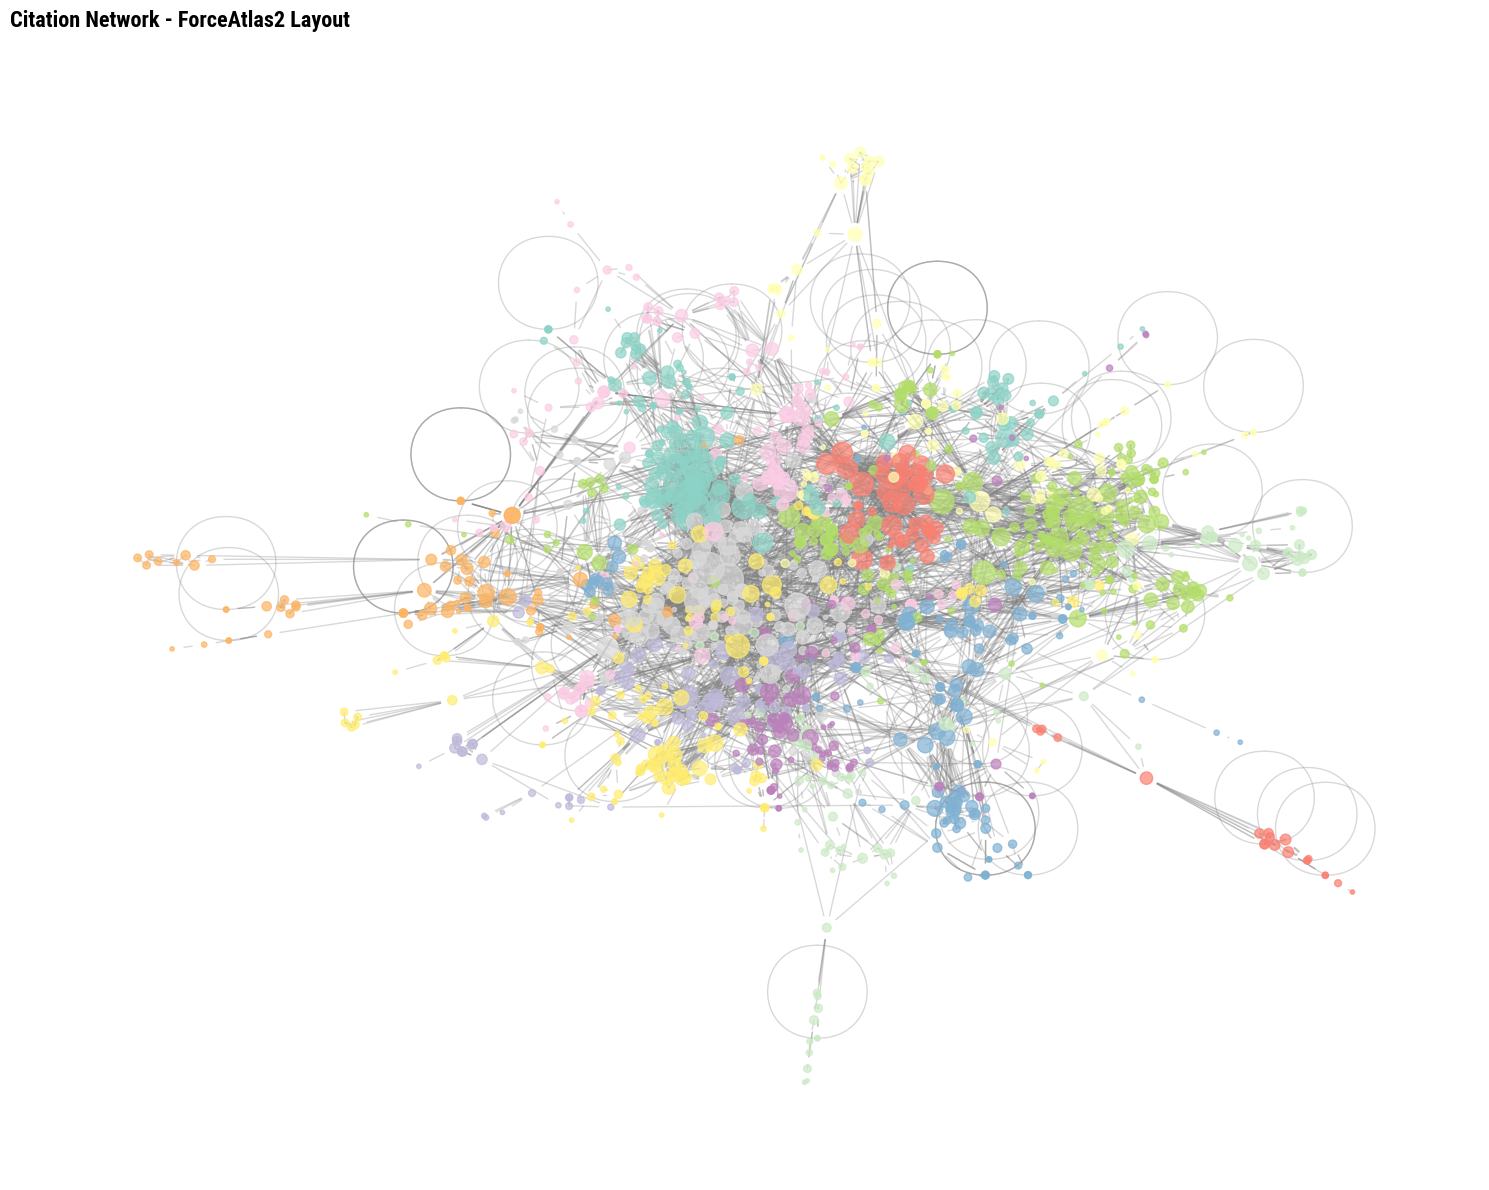

ForceAtlas2 layout completed for 4683 nodes and 7675 edges


In [76]:
# ForceAtlas2 layout and visualization using NetworkX
import matplotlib.pyplot as plt



node_degrees = dict(G_giant_component.degree())

    # Use NetworkX ForceAtlas2 layout
print("Computing ForceAtlas2 layout...")
positions = nx.forceatlas2_layout(G_giant_component, 
                                    max_iter=500,  # Number of iterations
                                    jitter_tolerance=1.0,  # Tolerance for speed adjustment
                                    scaling_ratio=2.,  # Scaling of forces
                                    gravity=5,  # Attraction to center
                                    distributed_action=False,  # Distribute attraction force
                                    node_size = {n: np.log(d+1) * 2 for n, d in G_giant_component.degree()},
                                    strong_gravity=False,  # Strong gravitational pull
                                    weight='weight',  # Edge weight attribute
                                    dissuade_hubs=True,  # Prevent hub clustering
                                    linlog=False,  # Use linear attraction
                                    seed=42,  # Random seed for reproducibility
                                    dim=2)  # 2D layout


print('Plotting the network...')
# Create the plot
plt.figure(figsize=(15, 12))

# Draw the network
# Scale node sizes by degree

node_sizes = [node_degrees[node] * 5 + 5 for node in G_giant_component.nodes()]

# Color nodes by community
node_colors = [node[1]['community'] for node in G_giant_component.nodes(data=True)]

nx.draw_networkx_nodes(G_giant_component, positions, 
                      node_size=node_sizes, 
                      node_color=node_colors, 
                      cmap=plt.cm.Set3,
                      alpha=0.7)

nx.draw_networkx_edges(G_giant_component, positions, 
                      edge_color='gray', 
                      alpha=0.3, 
                      arrows=True, 
                      arrowsize=10,
                      arrowstyle='-')

plt.title("Citation Network - ForceAtlas2 Layout", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"ForceAtlas2 layout completed for {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


In [77]:
# Compute PageRank on the network
print("Computing PageRank...")
pagerank_scores = nx.pagerank(G, weight='weight', alpha=0.85, max_iter=100, tol=1e-06)

# Get top 10 nodes by PageRank score
top_10_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 nodes by PageRank score:")
print("=" * 50)
for i, (node_id, score) in enumerate(top_10_pagerank, 1):
    # Get node name if available
    node_name = G.nodes[node_id].get('name', 'Unknown')
    print(f"{i:2d}. {node_name}")
    print(f"    ID: {node_id}")
    print(f"    PageRank: {score:.6f}")
    print(f"    Degree: {G.degree(node_id)}")
    print()


Computing PageRank...

Top 10 nodes by PageRank score:
 1. Erik Rietveld
    ID: https://openalex.org/A5002678933
    PageRank: 0.004301
    Degree: 73

 2. Gualtiero Piccinini
    ID: https://openalex.org/A5042488865
    PageRank: 0.004238
    Degree: 99

 3. Carl F. Craver
    ID: https://openalex.org/A5045269466
    PageRank: 0.004101
    Degree: 105

 4. Jelle Bruineberg
    ID: https://openalex.org/A5076229839
    PageRank: 0.003798
    Degree: 73

 5. Julian Kiverstein
    ID: https://openalex.org/A5054772796
    PageRank: 0.003534
    Degree: 63

 6. Karl Friston
    ID: https://openalex.org/A5086852785
    PageRank: 0.002950
    Degree: 49

 7. Gerhard Schurz
    ID: https://openalex.org/A5015294604
    PageRank: 0.002803
    Degree: 57

 8. Duncan Pritchard
    ID: https://openalex.org/A5082884079
    PageRank: 0.002701
    Degree: 72

 9. Michael D. Kirchhoff
    ID: https://openalex.org/A5076845357
    PageRank: 0.002641
    Degree: 51

10. Roman Frigg
    ID: https://openal